<a href="https://colab.research.google.com/github/Gogulaanand/Fault-Diagnosis/blob/master/Fault_Diagnosis(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf                                    #importing neccessary libraries and functions 
import numpy as np
import random as rn
np.random.seed(1132)
tf.set_random_seed(1503)
rn.seed(654)
from tensorflow.keras import layers
import pandas as pd
import io
import keras
from keras.layers import Dense,Dropout,Activation,BatchNormalization
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from google.colab import files                                  #uploading the file 
uploaded=files.upload()

Saving projdata1.csv to projdata1 (1).csv


In [0]:
df=pd.read_csv(io.StringIO(uploaded['projdata1.csv'].decode("utf-8")),engine='python',sep=",")  #reading the data from the uploaded file
ds=df.sample(frac=1)                                                                                #shuffling the data

y=ds.as_matrix(columns=ds.columns[4:])                                                    #seggregate the date into X,Y variables based on columns
X=ds.as_matrix(columns=ds.columns[1:4])
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
Y_train=to_categorical(Y_train,num_classes=4,dtype='int32')
Y_test=to_categorical(Y_test,num_classes=4,dtype='int32')

In [0]:
import os
os.environ['PYTHONHASHSEED']='0'

In [33]:
model=tf.keras.Sequential()  #defining the structure of the ANN model

model.add(layers.Dense(10,input_shape=(3,)))      #input layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))

model.add(layers.Dense(15))                       #1st hidden layer
keras.initializers.he_uniform(seed=153)
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))

model.add(layers.Dense(10))                       #2nd hidden layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))
 
model.add(layers.Dense(10))                       #3rd hidden layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))

model.add(layers.Dense(4))                        #output layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.Activation('softmax'))

# bias_regularizer=tf.keras.regularizers.l2(0.01),
# model.add(layers.Dropout(0.5))

model.compile(loss='categorical_crossentropy',optimizer=tf.train.AdamOptimizer(0.001),metrics=['accuracy'])
model.save_weights('model.h5')

history=model.fit(X_train,Y_train,validation_split=0.20,epochs=200,batch_size=128,shuffle=False)  #training the ANN model
model.load_weights('model.h5')

Train on 64000 samples, validate on 16000 samples
Epoch 1/200
64000/64000 [==============================] - 2s 31us/sample - loss: 0.9562 - acc: 0.5795 - val_loss: 0.8238 - val_acc: 0.6201
Epoch 2/200
64000/64000 [==============================] - 1s 20us/sample - loss: 0.4238 - acc: 0.8771 - val_loss: 0.3352 - val_acc: 0.9093
Epoch 3/200
64000/64000 [==============================] - 1s 21us/sample - loss: 0.3525 - acc: 0.8954 - val_loss: 0.2701 - val_acc: 0.9342
Epoch 4/200
64000/64000 [==============================] - 1s 21us/sample - loss: 0.2830 - acc: 0.9054 - val_loss: 0.1934 - val_acc: 0.9509
Epoch 5/200
64000/64000 [==============================] - 1s 21us/sample - loss: 0.2497 - acc: 0.9123 - val_loss: 0.1729 - val_acc: 0.9566
Epoch 6/200
64000/64000 [==============================] - 1s 21us/sample - loss: 0.2380 - acc: 0.9153 - val_loss: 0.1627 - val_acc: 0.9574
Epoch 7/200
64000/64000 [==============================] - 1s 21us/sample - loss: 0.2302 - acc: 0.9176 - val_l

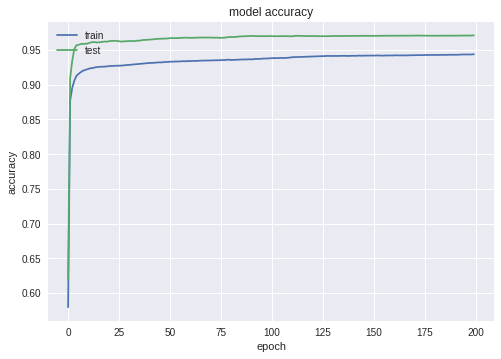

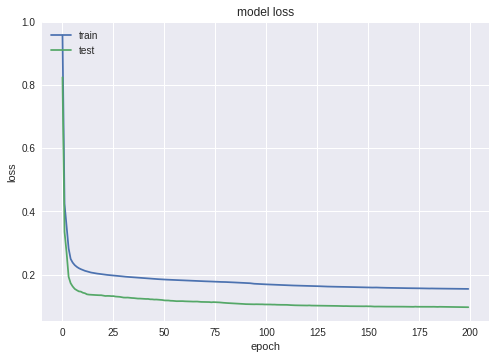

20000/20000 [==============================] - 0s 12us/sample - loss: 0.1016 - acc: 0.9690
0.969


In [34]:
plt.plot(history.history['acc'])                                                  #model accuracy plot
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
                                                                                  #model loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

test_loss,test_acc=model.evaluate(X_test,Y_test,batch_size=128)                    #test data evaluation(data unseen by the ANN)
print(test_acc)